In [1]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

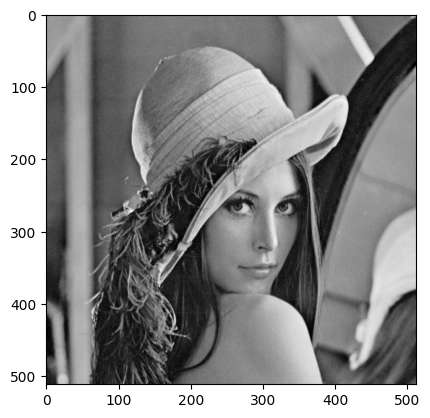

In [2]:
im = cv.imread("CoverImages/lena.tiff",0)
plt.imshow(im,cmap='gray')
plt.show()

In [3]:
x = im.ravel()
binlist = []
for i in range(512*512):
    binlist.append(bin(x[i]))

In [4]:
def f0(num):
    t = 0b00000001
    t = num & t
    return t



bitMat0 = np.zeros((512,512), dtype=int)

k = 0
for i in range(512):
    for j in range(512):
        bitMat0[i][j] = f0(int(binlist[k],2))
        k = k+1
bitMat0

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0]])

## Read Image 

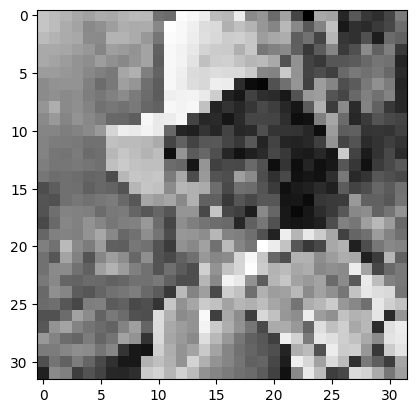

In [5]:
img1 = cv.imread("CoverImages/elaine.tiff",0)
rimg = cv.resize(img1, (32,32))
plt.imshow(rimg,cmap='gray')
plt.show()

In [6]:
(rimg)

array([[192, 185, 178, ...,  71,  90, 134],
       [192, 185, 172, ...,  81,  91, 122],
       [184, 178, 171, ...,  58, 120, 112],
       ...,
       [133, 134, 142, ...,  80, 197, 217],
       [ 98, 127, 112, ..., 110,  83, 167],
       [ 60, 145, 137, ..., 171, 130, 162]], dtype=uint8)

In [7]:
def int_to_binary_list(integer_input):
    binary_representation = bin(integer_input)[2:]
    binary_representation = binary_representation.zfill(8)
    binary_list = [int(bit) for bit in binary_representation]
    return binary_list

D2List = []

for i in range(32):
    for j in range(32):
        D2List.append(int_to_binary_list(rimg[i][j]))
D1List = []

len(D2List)
for i in range(1024):
    for j in range(8):
        D1List.append(D2List[i][j])
D1List

[1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,


## Encoding

In [8]:
k = 0
encode = np.zeros((512,512))
for i in range(512):
    for j in range(512):
        if (k == (32*32*8)):
            break
        else:
            encode[i][j] = D1List[k] + bitMat0[i][j]
            k = k+1

In [9]:
temp = np.zeros((512,512), dtype=int)

In [10]:
for i in range(512):
    for j in range(512):
        temp[i][j] = im[i][j]


In [11]:
## Adding the Encoded Matrix
for i in range(512):
    for j in range(512):
        temp[i][j] = im[i][j] + encode[i][j] - bitMat0[i][j]

In [12]:
im[0][500]

118

In [13]:
temp[0][500]

119

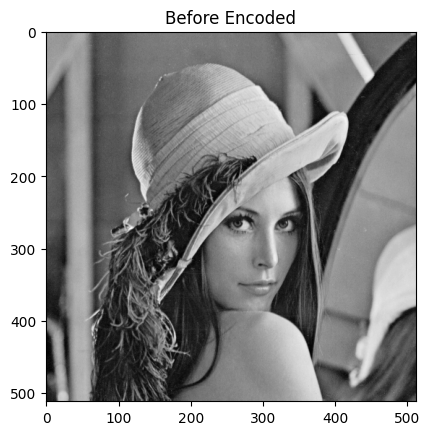

In [14]:
plt.imshow(im, cmap='gray')
plt.title("Before Encoded")
plt.show()

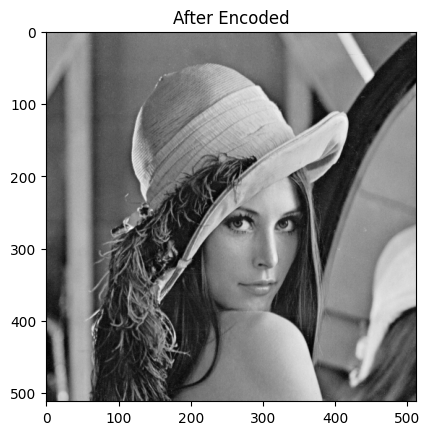

In [15]:
plt.imshow(temp, cmap='gray')
plt.title("After Encoded")
plt.show()

In [16]:
temp1 = np.zeros((512,512), dtype=int)

In [17]:
## Decription
temp1 = abs(temp - im)

In [18]:
temp1[0:1,0:8]

array([[1, 1, 0, 0, 0, 0, 0, 0]])

In [19]:
l = []
for i in range(512):
    for j in range(512):
        l.append(int(temp1[i][j]))
len(l)

262144

In [20]:
decode = np.array(32768)

In [21]:
j = 0
r = []
for i in range(0,262144,8):
    if j == 32*32:
        break
    else:
        t = (128*l[i] + 64*l[i+1] + 32*l[i+2] + 16*l[i+3] + 8*l[i+4] + 4*l[i+5] + 2*l[i+6] + l[i+7])
        j = j+1
        r.append(t)
j
len(r)

1024

In [22]:
array_2d = np.array(r).reshape(32,32)
array_2d

array([[192, 185, 178, ...,  71,  90, 134],
       [192, 185, 172, ...,  81,  91, 122],
       [184, 178, 171, ...,  58, 120, 112],
       ...,
       [133, 134, 142, ...,  80, 197, 217],
       [ 98, 127, 112, ..., 110,  83, 167],
       [ 60, 145, 137, ..., 171, 130, 162]])

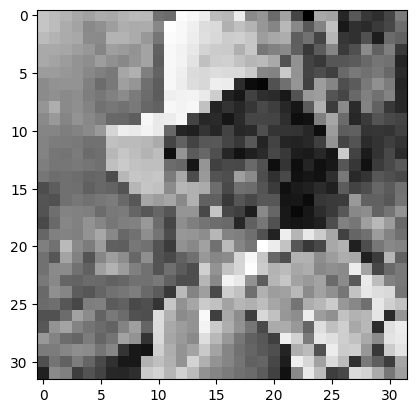

In [23]:
plt.imshow(array_2d,cmap='gray')
plt.show()

In [24]:
def calculate_mse(original_image, stego_image):
    if original_image.shape != stego_image.shape:
        raise ValueError("Images must have the same dimensions.")
    squared_diff = (original_image - stego_image)**2
    mse = np.mean(squared_diff)
    return mse

In [25]:
mse_value = calculate_mse(im, temp)

print(f"Mean Squared Error: {mse_value}")

Mean Squared Error: 0.5017814636230469
